### Welcome to the exercise about observational studies! This exercise will be hands on, and you will be able to practise the skills you developed so far!

## Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 6 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to deepen your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

In [16]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from statsmodels.stats import diagnostic
%matplotlib inline

data_folder = './data/'
df = pd.read_csv(data_folder + 'lalonde.csv')

In [17]:
df.sample(10)

id  treat  age  educ  black  hispan  married  nodegree       re74  \
227   PSID43      0   25    12      0       0        1         0  11516.570   
378  PSID194      0   28    10      0       0        1         1   7578.444   
287  PSID103      0   21    12      0       0        0         0   9665.063   
244   PSID60      0   25     7      0       0        1         1   5597.625   
158   NSW159      1   27    10      1       0        0         1   1001.146   
563  PSID379      0   33    12      0       1        1         0      0.000   
369  PSID185      0   18    10      0       0        0         1      0.000   
307  PSID123      0   25    12      0       0        1         0  21469.650   
15     NSW16      1   19    10      1       0        0         1      0.000   
66     NSW67      1   27    11      1       0        0         1      0.000   

         re75        re78  
227  7263.339  19588.7400  
378  1383.919   2404.2610  
287  4110.581   1687.5640  
244  6099.629    122.6513  
158  3550.075      0.0000  
563     0.000   5841.4530  
369  1491.339    237.9140  
307  3405.194   7981.2010  
15      0.000   3228.5030  
66      0.000      0.0000

## 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lecture 4 ("Descibing data") and 3 ("Visualizing data").

What might a naive "researcher" conclude from this superficial analysis?

(0.23289902280130292, 0.0009999999999998899)
Overall:
count      614.000000
mean      6792.834483
std       7470.730792
min          0.000000
25%        238.283425
50%       4759.018500
75%      10893.592500
max      60307.930000
Name: re78, dtype: float64
Treated:
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64
Control:
count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64


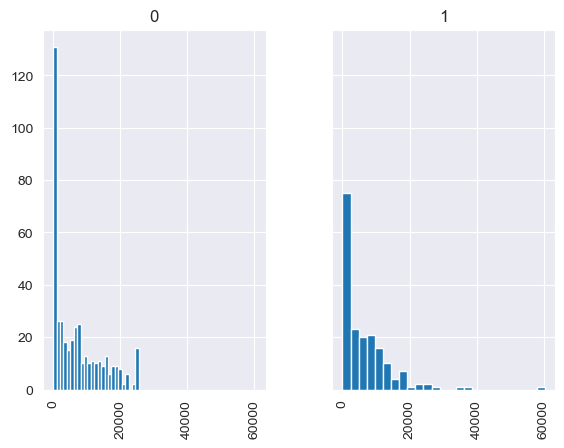

In [21]:
''' your code and explanations ''';
df["re78"].hist(by=df["treat"], sharey=True, sharex=True, bins = 25)
print(diagnostic.kstest_normal(df['re78'].values, dist = 'exp'))
print("Overall:")
print(df["re78"].describe())
print("Treated:")
print(df[df["treat"] == 1]["re78"].describe())
print("Control:")
print(df[df["treat"] == 0]["re78"].describe())

Could conclude that the program is inefficient

## 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

Index(['id', 'treat', 'age', 'educ', 'black', 'hispan', 'married', 'nodegree',
       're74', 're75', 're78'],
      dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x1eb13445520>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb13445a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb133339d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1eb13445fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1eb13453280>,
 'means': []}

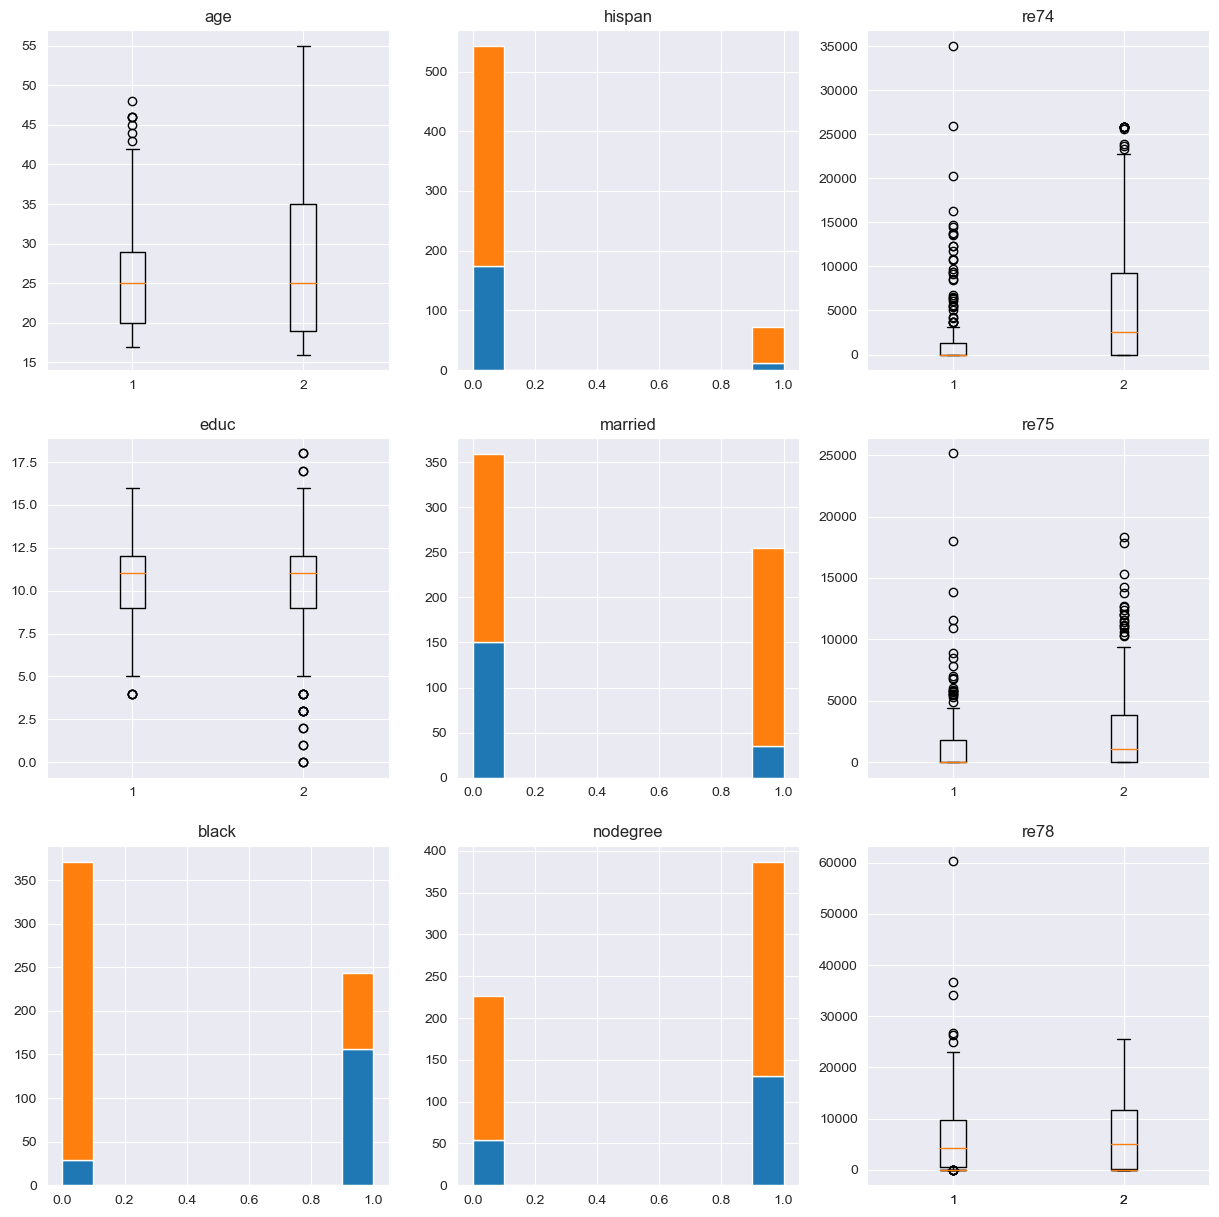

In [43]:
''' your code and explanations '''
import math
print(df.columns)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(9):
    sbplt = axs[i%3, math.floor(i/3)]
    if i+2 in range (4,8):
            sbplt.hist([df[df["treat"] == 1][df.columns[i+2]], df[df["treat"] == 0][df.columns[i+2]]], stacked = True)
    else:
        sbplt.boxplot([df[df["treat"] == 1][df.columns[i+2]], df[df["treat"] == 0][df.columns[i+2]]])
    sbplt.set_title(df.columns[i+2])

age_treat = df[df["treat"] == 1]["age"]
age_control = df[df["treat"] == 0]["age"]
plt.boxplot([age_treat, age_control])

C:\Users\xagao\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


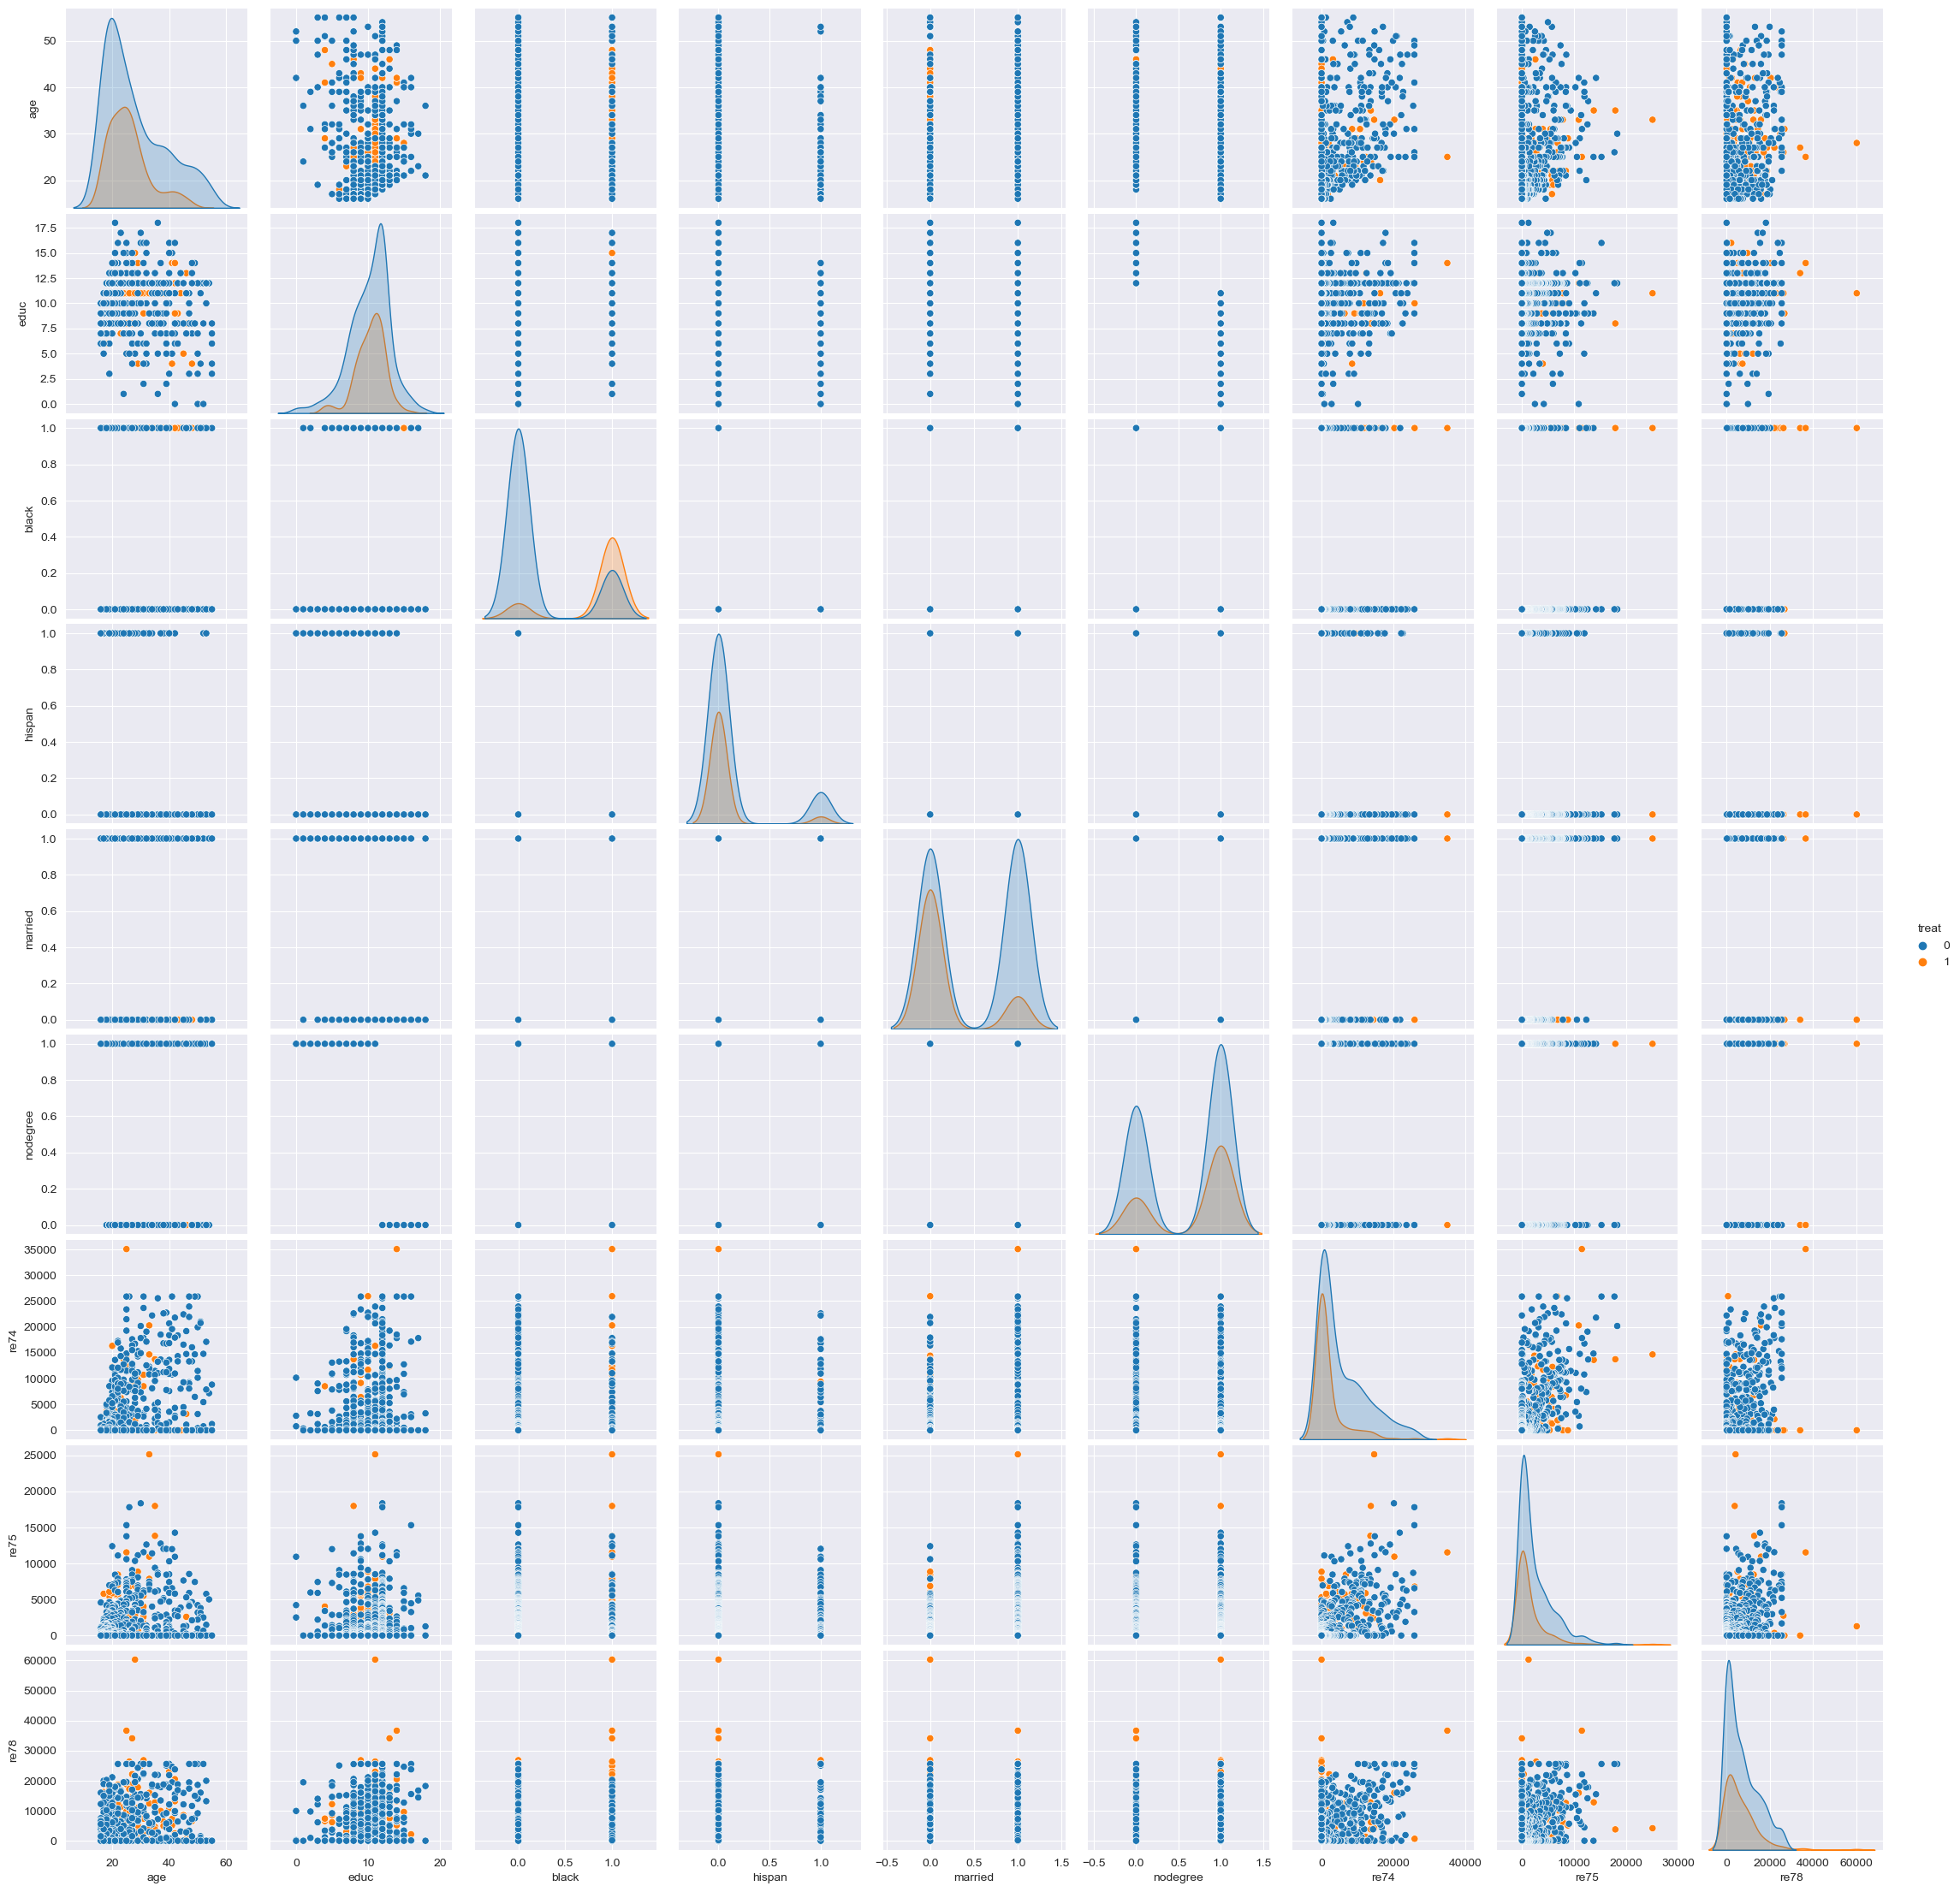

In [44]:
sns.pairplot(df, hue="treat")

## 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `statsmodels` to fit the logistic regression model and apply it to each data point to obtain propensity scores.

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144483/pdf/hmbr46-399.pdf).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144483/pdf/hmbr46-399.pdf).)

In [63]:
''' your code and explanations '''
import statsmodels.formula.api as smf
df = pd.read_csv(data_folder + 'lalonde.csv')
standardized_df = df.copy()

def standardize(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean())/df[column].std()
    return df

standardized_df = standardize(standardized_df, ["age", "educ", "re74", "re75"])


formula = "treat ~ age + educ + C(black) + C(hispan) + C(married) + C(nodegree) + re74 + re75"

model = smf.logit(formula=formula, data=standardized_df)
result = model.fit()
df["propensity_score"] = result.predict(standardized_df)
print(df["propensity_score"].describe())
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
count    614.000000
mean       0.301303
std        0.290313
min        0.009080
25%        0.048536
50%        0.120676
75%        0.638716
max        0.853153
Name: propensity_score, dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.3508
Time:                        14:52:17   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [

## 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

This is how networkx library can help you do this. Each possible pair of (treated_person, control_person) is characterized by a similarity. This is how we can initialize a graph, and add an edge for one possible pair. We then need to add an edge for each possible pair.
    - G = nx.Graph()
    - G.add_weighted_edges_from([(control_person, treated_person, similarity)])
Optimal matching is then found with:
    - matching = nx.max_weight_matching(G)

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

In [86]:
''' your code and explanations '''
import networkx as nx

treating = df[df["treat"] == 1]
controlling = df[df["treat"] == 0]

G = nx.Graph()

for treated in treating.index:
    for control in controlling.index:
        G.add_weighted_edges_from([(treated, control, 1 - abs(df["propensity_score"][treated] - df["propensity_score"][control]))])

matching = nx.max_weight_matching(G)      



id  treat  age  educ  black  hispan  married  nodegree  re74  re75  \
0       NSW1      1   37    11      1       0        1         1   0.0   0.0   
1       NSW2      1   22     9      0       1        0         1   0.0   0.0   
2       NSW3      1   30    12      1       0        0         0   0.0   0.0   
3       NSW4      1   27    11      1       0        0         1   0.0   0.0   
4       NSW5      1   33     8      1       0        0         1   0.0   0.0   
..       ...    ...  ...   ...    ...     ...      ...       ...   ...   ...   
609  PSID425      0   18    11      0       0        0         1   0.0   0.0   
610  PSID426      0   24     1      0       1        1         1   0.0   0.0   
611  PSID427      0   21    18      0       0        0         0   0.0   0.0   
612  PSID428      0   32     5      1       0        1         1   0.0   0.0   
613  PSID429      0   16     9      0       0        0         1   0.0   0.0   

           re78  propensity_score  
0     9930.0460          0.638770  
1     3595.8940          0.224634  
2    24909.4500          0.678244  
3     7506.1460          0.776324  
4      289.7899          0.701639  
..          ...               ...  
609  10150.5000          0.123144  
610  19464.6100          0.034560  
611      0.0000          0.183351  
612    187.6713          0.383032  
613   1495.4590          0.089712  

[614 rows x 12 columns]

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184],
      dtype='int64', length=185)
Index([185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       ...
       604, 605, 606, 607, 608, 609, 610, 611, 612, 613],
      dtype='int64', length=429)


In [88]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

balanced_df = df.iloc[matched]


## 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\2233956767.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sbplt.hist([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[df["treat"] == 0][balanced_df.columns[i+2]]], stacked = True)
C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\2233956767.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sbplt.hist([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[df["treat"] == 0][balanced_df.columns[i+2]]], stacked = True)
C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\2233956767.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sbplt.hist([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[df["treat"] == 0][balanced_df.columns[i+2]]], stacked = True)
C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\2233956767.py:7: UserWarning: Boolean Series key will be reinde

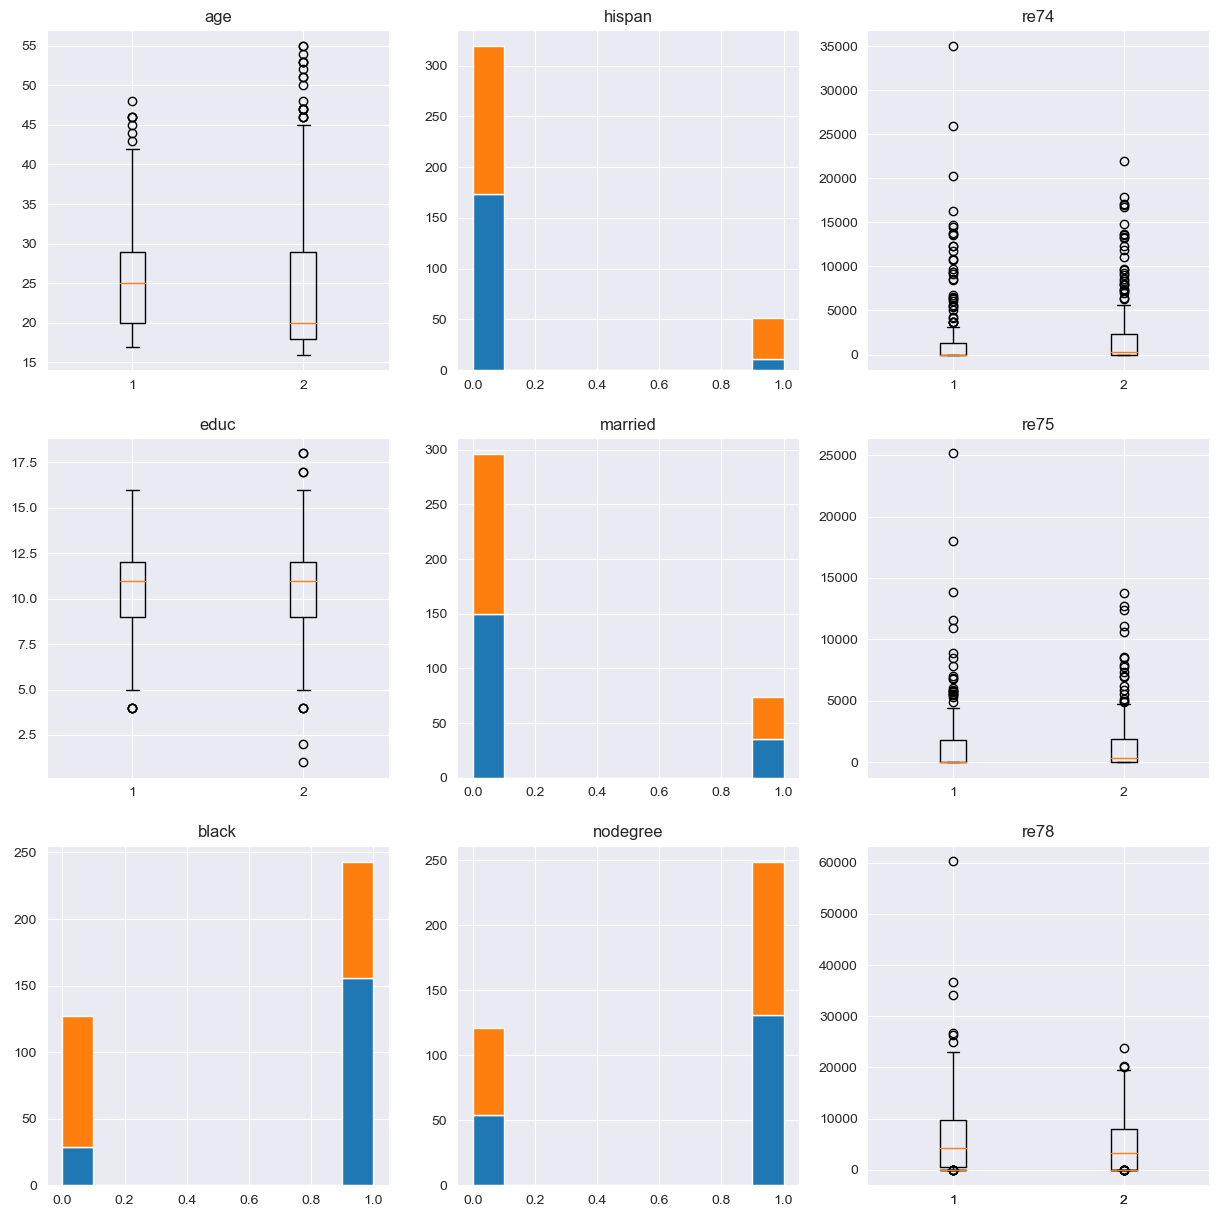

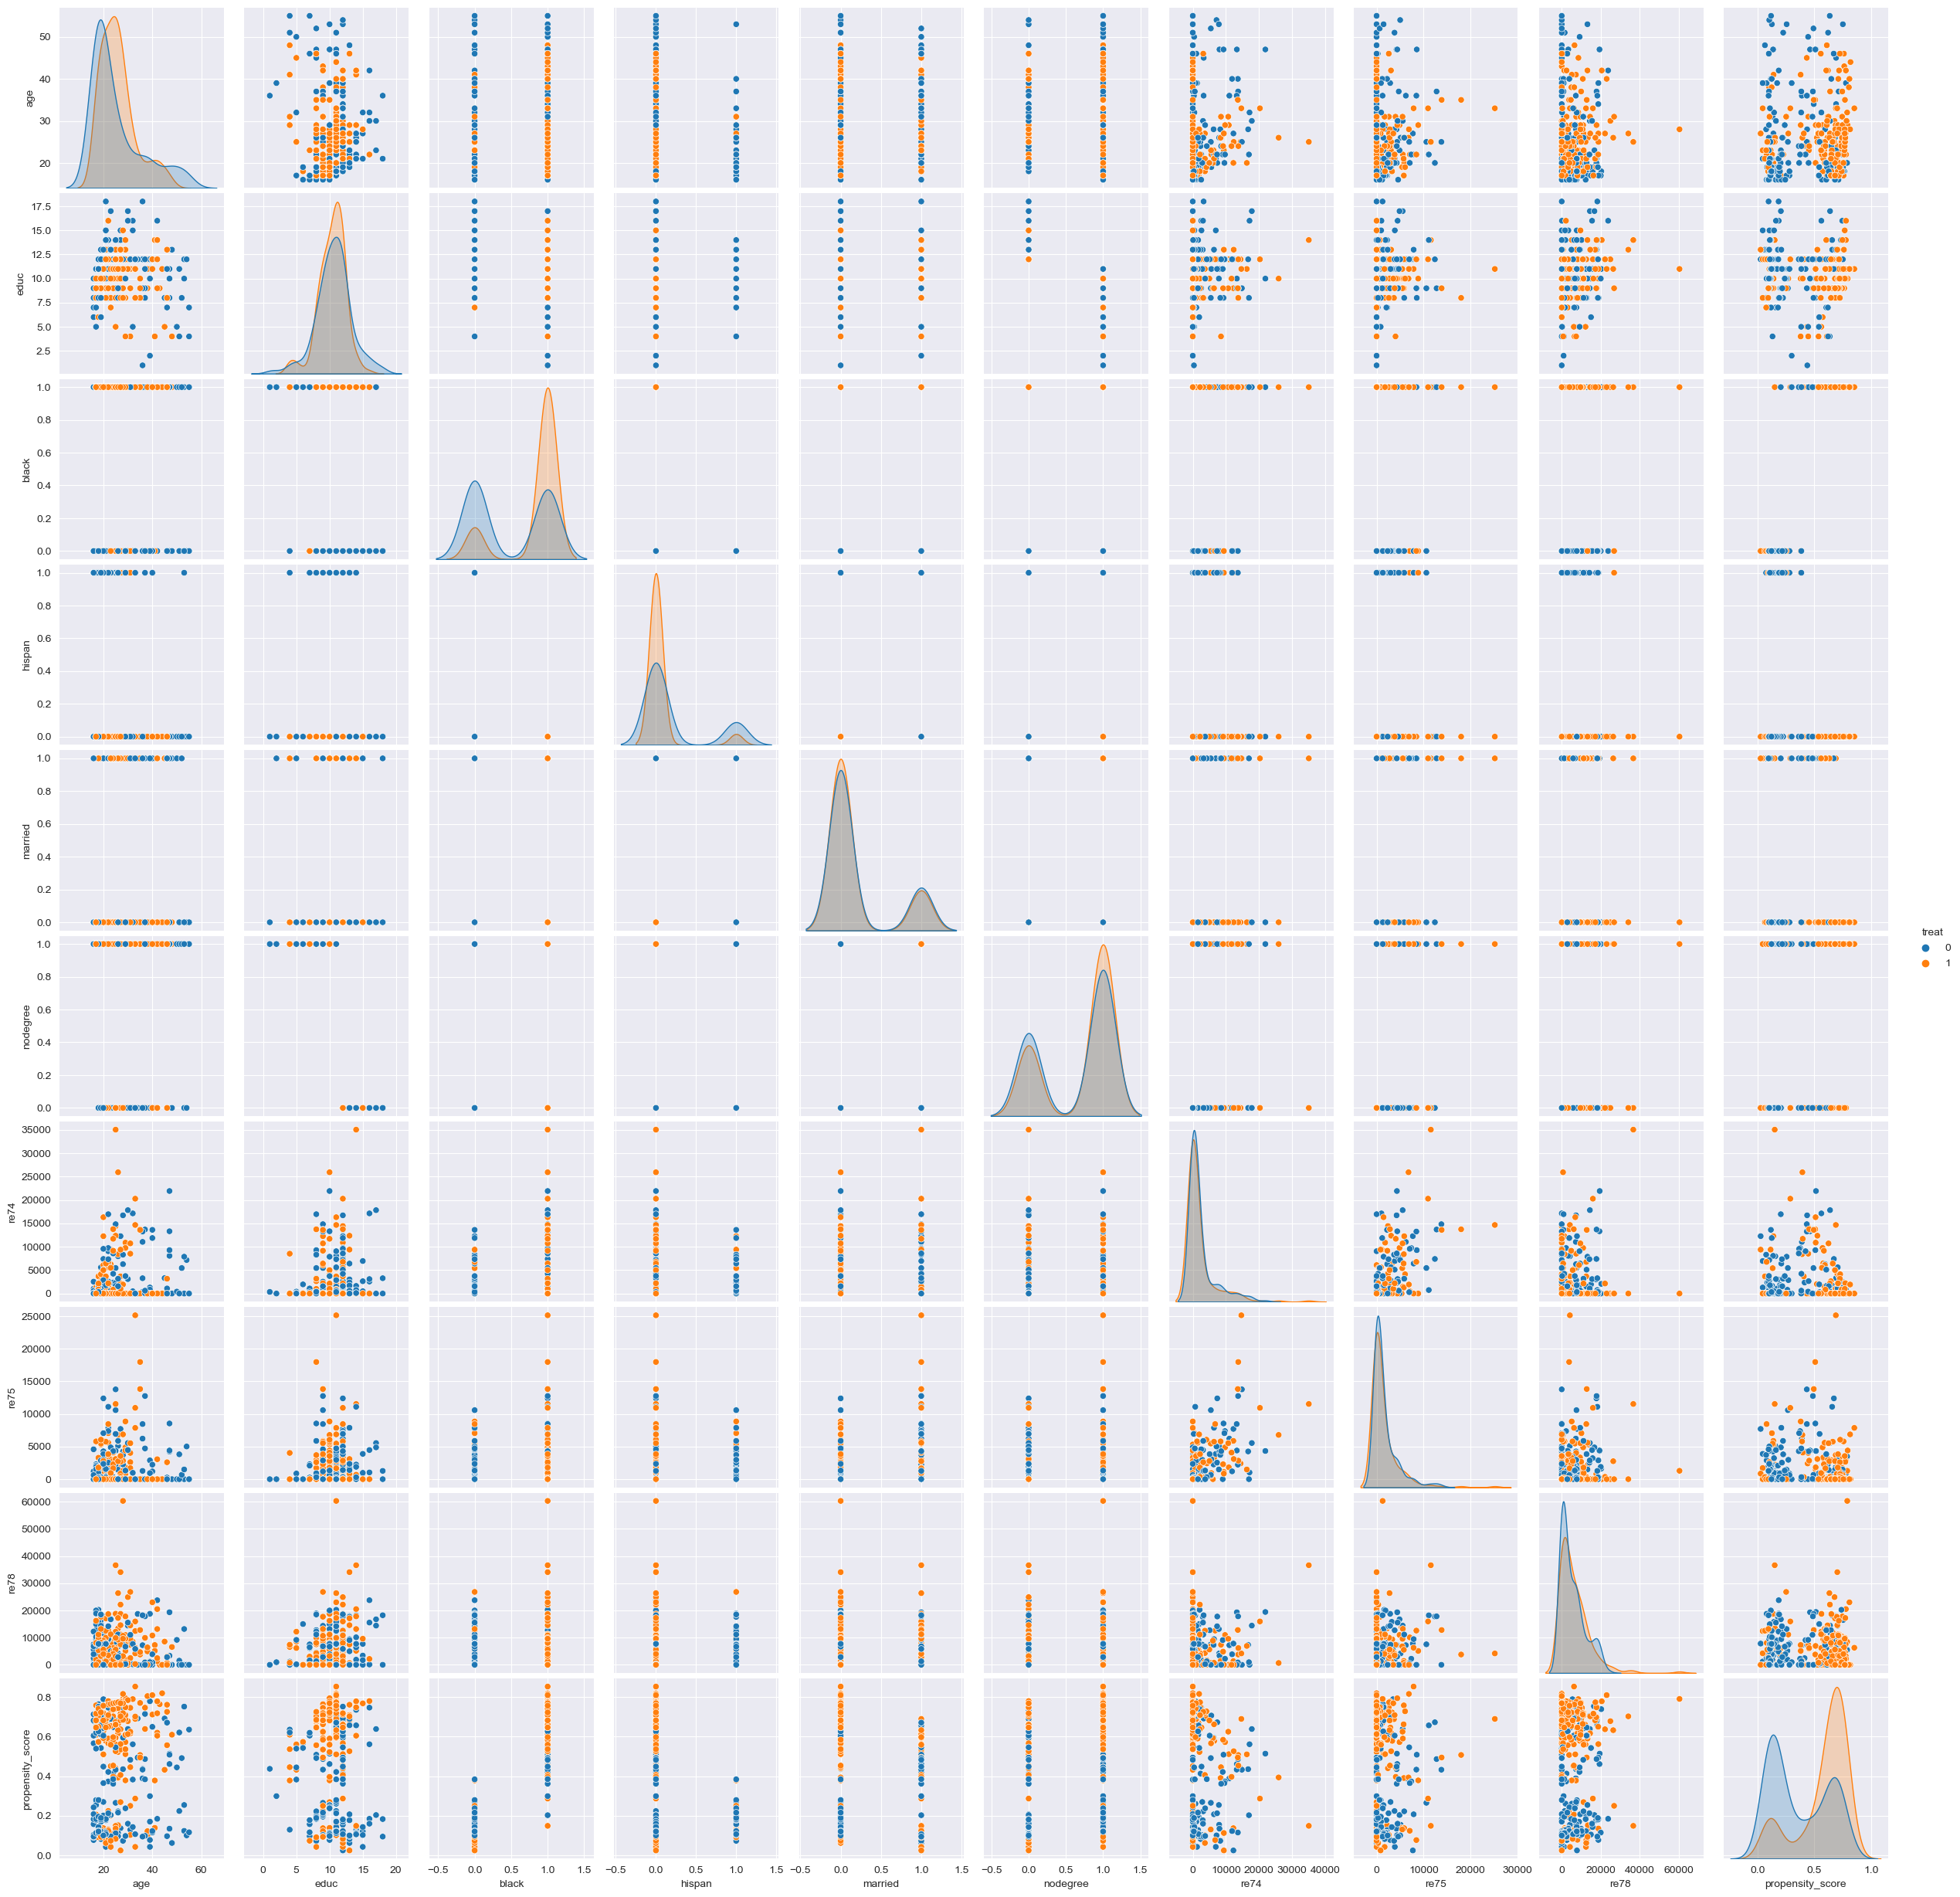

In [89]:
''' your code and explanations '''
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(9):
    sbplt = axs[i%3, math.floor(i/3)]
    if i+2 in range (4,8):
        sbplt.hist([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[df["treat"] == 0][balanced_df.columns[i+2]]], stacked = True)
    else:
        sbplt.boxplot([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[balanced_df["treat"] == 0][balanced_df.columns[i+2]]])
    sbplt.set_title(balanced_df.columns[i+2])

age_treat = balanced_df[balanced_df["treat"] == 1]["age"]
age_control = balanced_df[balanced_df["treat"] == 0]["age"]
plt.boxplot([age_treat, age_control])

sns.pairplot(balanced_df, hue="treat")

C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\2921821276.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sbplt.hist([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[df["treat"] == 0][balanced_df.columns[i+2]]], stacked = True)
C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\2921821276.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sbplt.hist([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[df["treat"] == 0][balanced_df.columns[i+2]]], stacked = True)
C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\2921821276.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sbplt.hist([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[df["treat"] == 0][balanced_df.columns[i+2]]], stacked = True)
C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\2921821276.py:20: UserWarning: Boolean Series key will be re

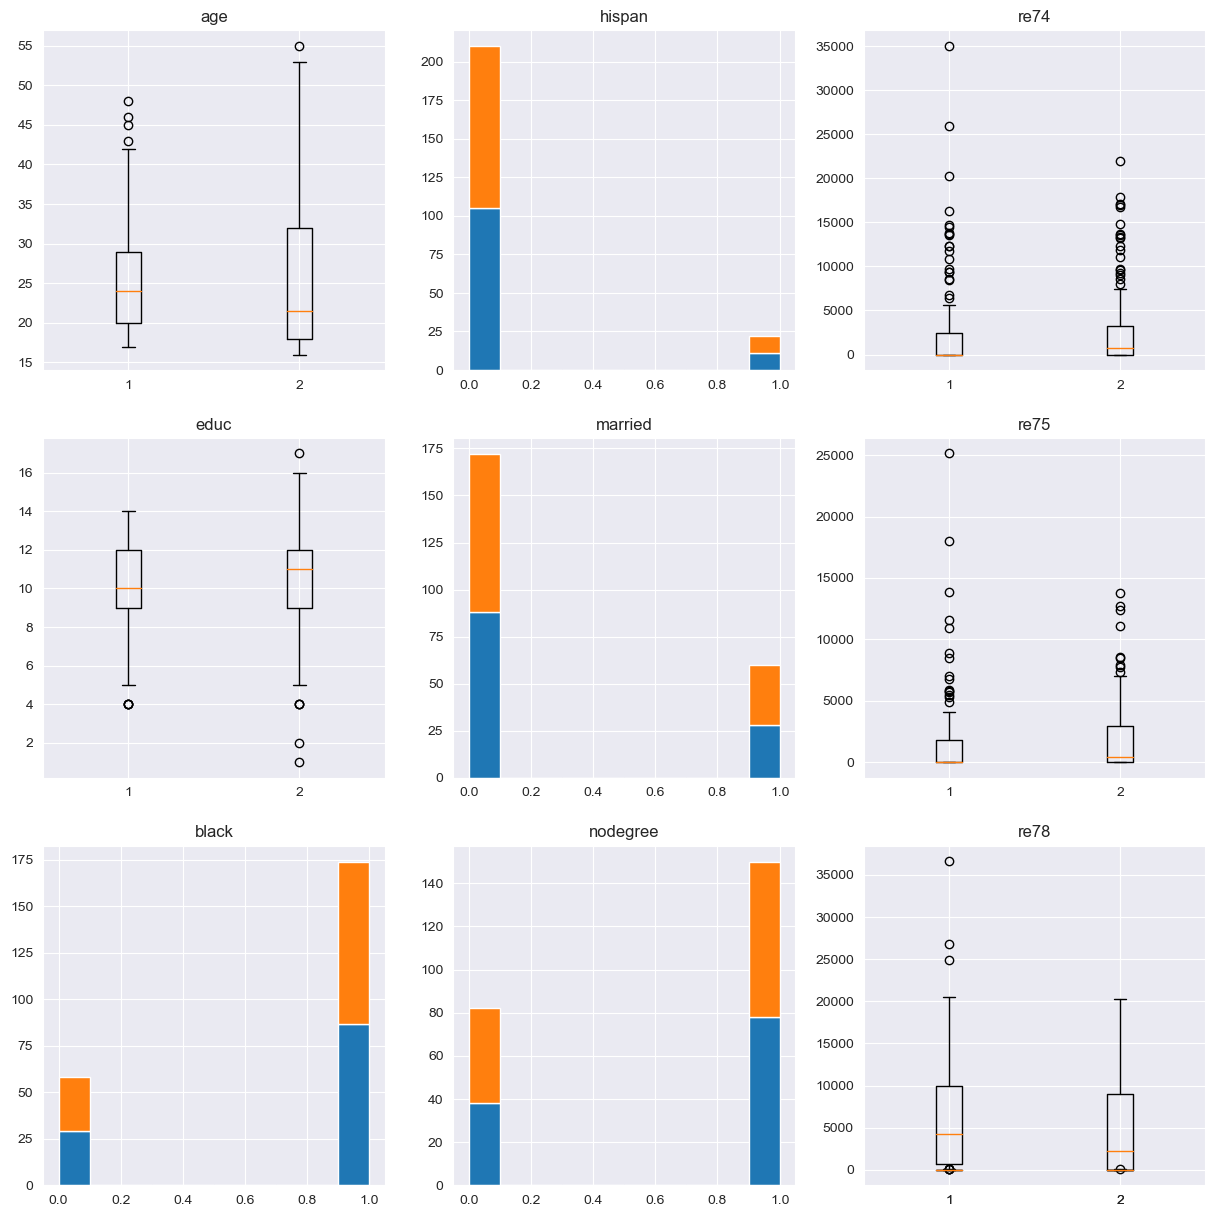

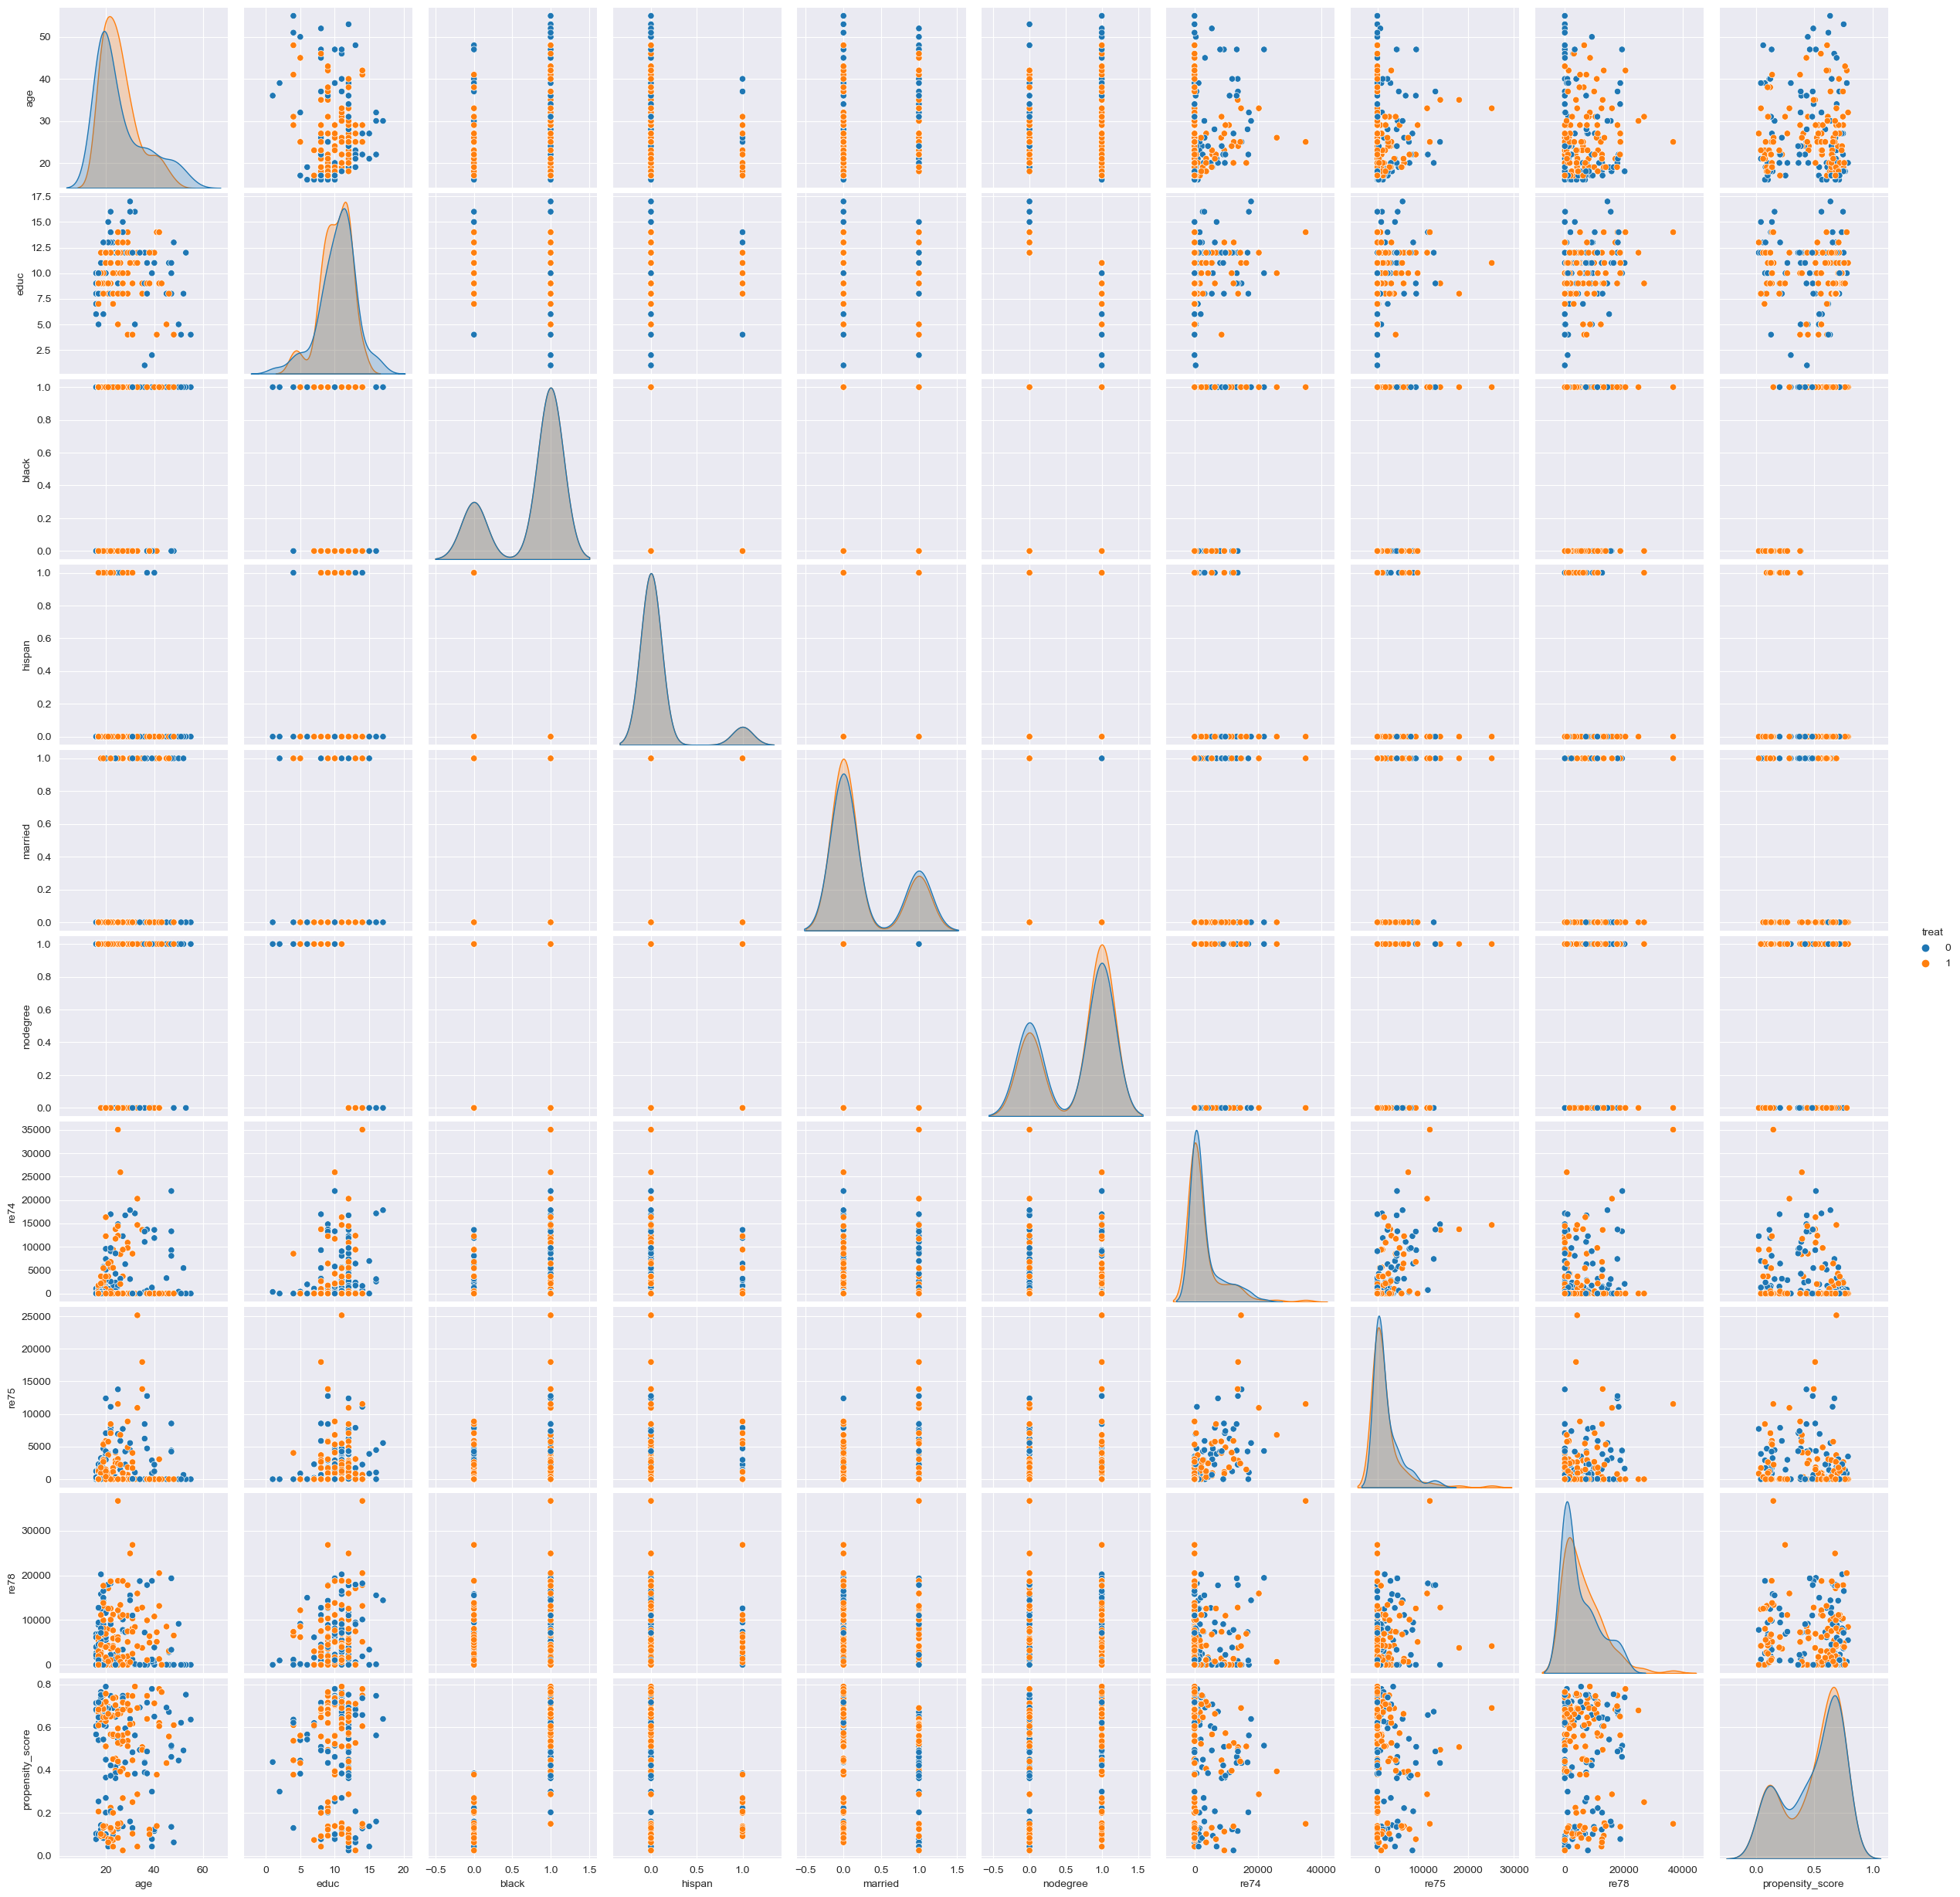

In [98]:
G = nx.Graph()

treating = df[df["treat"] == 1]
controlling = df[df["treat"] == 0]
for treated in treating.index:
    for control in controlling.index:
        if df["black"][treated] == controlling["black"][control] and treating["hispan"][treated] == controlling["hispan"][control]:
            G.add_weighted_edges_from([(treated, control, 1 - abs(treating["propensity_score"][treated] - controlling["propensity_score"][control]))])

matching = nx.max_weight_matching(G)
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

balanced_df = df.iloc[matched]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(9):
    sbplt = axs[i%3, math.floor(i/3)]
    if i+2 in range (4,8):
        sbplt.hist([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[df["treat"] == 0][balanced_df.columns[i+2]]], stacked = True)
    else:
        sbplt.boxplot([balanced_df[balanced_df["treat"] == 1][balanced_df.columns[i+2]], balanced_df[balanced_df["treat"] == 0][balanced_df.columns[i+2]]])
    sbplt.set_title(balanced_df.columns[i+2])

age_treat = balanced_df[balanced_df["treat"] == 1]["age"]
age_control = balanced_df[balanced_df["treat"] == 0]["age"]
plt.boxplot([age_treat, age_control])

sns.pairplot(balanced_df, hue="treat")

## 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?

(0.25326812723420705, 0.0009999999999998899)
Overall:
count      232.000000
mean      5630.943889
std       6367.498345
min          0.000000
25%         23.274195
50%       3494.377000
75%       9107.598000
max      36646.950000
Name: re78, dtype: float64
Treated:
count      116.000000
mean      6166.431753
std       6655.656670
min          0.000000
25%        672.490925
50%       4300.659000
75%      10001.218250
max      36646.950000
Name: re78, dtype: float64
Control:
count      116.000000
mean      5095.456025
std       6047.014862
min          0.000000
25%          0.000000
50%       2256.488500
75%       8942.092750
max      20243.380000
Name: re78, dtype: float64


C:\Users\xagao\AppData\Local\Temp\ipykernel_5736\1039337203.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(balanced_df[df["treat"] == 1]["re78"].describe())


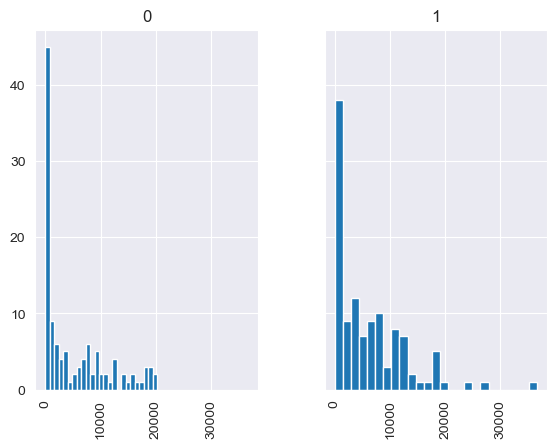

In [99]:
''' your code and explanations ''';
balanced_df["re78"].hist(by=df["treat"], sharey=True, sharex=True, bins = 25)
print(diagnostic.kstest_normal(balanced_df['re78'].values, dist = 'exp'))
print("Overall:")
print(balanced_df["re78"].describe())
print("Treated:")
print(balanced_df[df["treat"] == 1]["re78"].describe())
print("Control:")
print(balanced_df[balanced_df["treat"] == 0]["re78"].describe())

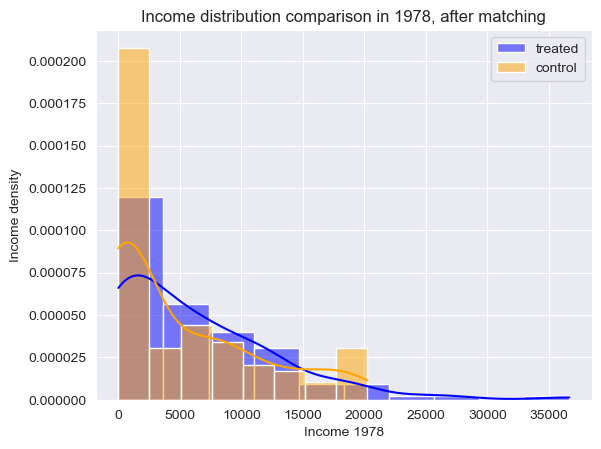

In [108]:
ax = sns.histplot(balanced_df[balanced_df["treat"]== 1]['re78'], kde=True, stat='density', color='blue', label='treated')
ax = sns.histplot(balanced_df[balanced_df["treat"]== 0]['re78'], kde=True, stat='density', color='orange', label='control')

ax.set(title='Income distribution comparison in 1978, after matching',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()